SQL to create full data set and steps to clean dataframe

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [2]:
data = pd.read_sql("""
                   SELECT rps.documentdate ::date
                       ,rps.saleprice :: numeric(10,2)
                       ,rps.propertytype 
                       ,rps.principaluse 
                       ,rps.saleinstrument :: int
                       ,rps.currentuseland 
                       ,rps.historicproperty
                       ,rps.salereason :: int
                       ,rps.propertyclass :: int 
                       ,SUBSTRING (rb.zipcode, 1,5) AS zipcode
                       ,rb.streettype
                       ,rb.stories
                       ,rb.buildinggrade :: int
                       ,rb.squarefeettotalliving :: int
                       ,rb.squarefeettotalbasement :: int
                       ,rb.squarefeetgarageattached
                       ,rb.squarefeetopenporch :: int
                       ,rb.squarefeetdeck :: int
                       ,rb.bedrooms :: int
                       ,rb.BathHalfCount :: int
                       ,rb.Bath3qtrCount :: int
                       ,rb.BathFullCount :: int
                       ,rb.FireplaceSingleStory 
                       ,rb.FireplaceMultipleStory 
                       ,rb.FireplaceFreeStanding 
                       ,rb.FireplaceAdditional 
                       ,rb.YearBuilt :: int
                       ,rb.YearRenovated :: int
                       ,rb.PercentComplete 
                       ,rb.Obsolescence 
                       ,rb.PercentNetCondition
                       ,rb.Condition 
                       ,p.township 
                       ,p.propertytype
                       ,p.districtname
                       ,p.levycode
                       ,p.lotsquarefootage
                       ,p.watersystem 
                       ,p.access 
                       ,p.topography 
                       ,p.ViewMtRanier 
                       ,p.ViewOlympics 
                       ,p.ViewCascades 
                       ,p.ViewTerritorial 
                       ,p.ViewSeattleSkyline 
                       ,p.ViewPugetSound
                       ,p.ViewLakeWashington 
                       ,p.ViewLakeSammamish 
                       ,p.ViewSmallLakeRiverCreek 
                       ,p.ViewOtherView 
                       ,p.WaterfrontLocation 
                       ,p.WaterfrontFootage 
                       ,p.WaterfrontBank 
                       ,p.WaterfrontPoorQualtiy 
                       ,p.WaterfrontRestrictedAccess 
                       ,p.WaterfrontAccessRights 
                       ,p.WaterfrontProximityInfluence
                       ,p.TidelandShoreland 
                       ,p.LotDepthFactopr 
                       ,p.TrafficNoise 
                       ,p.AirportNoise 
                       ,p.PowerLines 
                       ,p.OtherNuisances 
                FROM real_property_sales rps
                JOIN residential_building rb
                     ON rps.major = rb.major
                     AND rps.minor = rb.minor
                JOIN parcel p
                     ON p.major = rps.major
                     AND p.minor = rps.minor
                WHERE  (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                        AND (rps.saleinstrument = '3' OR rps.saleinstrument = '2');
                """, conn)

In [3]:
data.to_csv('../asp_original')

In [4]:
data.shape

(18182, 63)

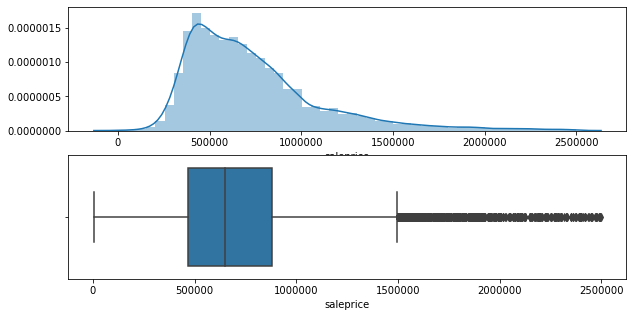

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.saleprice, ax = ax[0])
sns.boxplot(data.saleprice, ax= ax[1]);

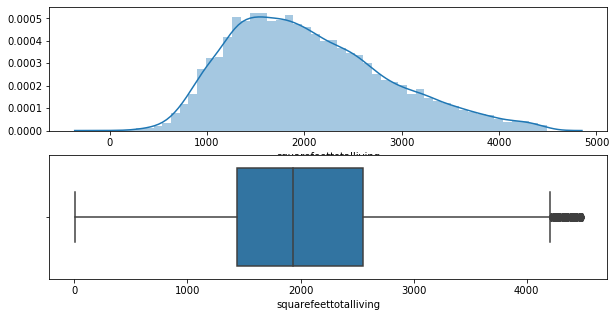

In [6]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.squarefeettotalliving, ax = ax[0])
sns.boxplot(data.squarefeettotalliving, ax= ax[1]);

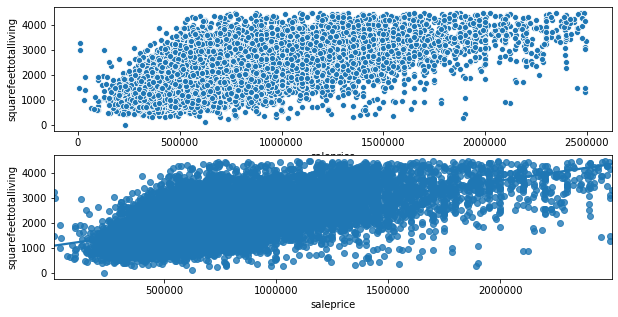

In [7]:
x = data.saleprice
y = data.squarefeettotalliving
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.scatterplot(x,y, ax = ax [0])
sns.regplot(x,y, ax = ax [1])

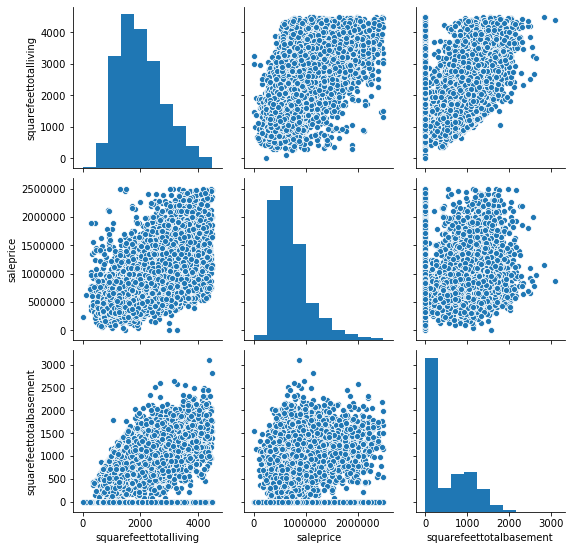

In [8]:
sns.pairplot(data = data[['squarefeettotalliving','saleprice','squarefeettotalbasement']])

In [9]:
data.corr()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,stories,buildinggrade,squarefeettotalliving,squarefeettotalbasement,...,percentcomplete,obsolescence,percentnetcondition,condition,township,lotsquarefootage,watersystem,access,topography,lotdepthfactopr
saleprice,1.000000,-0.009289,NaN,0.019072,-0.019870,-0.033387,0.291290,0.616371,0.596841,0.225156,...,0.029503,-0.007016,-0.009850,-0.039693,0.460482,0.059701,0.010779,-0.053280,0.135018,0.085101
propertytype,-0.009289,1.000000,NaN,0.003744,-0.000966,-0.009551,0.061270,-0.003994,-0.042931,-0.003406,...,0.017892,-0.004053,-0.001259,-0.044288,0.031996,-0.027352,0.014165,-0.014450,-0.012792,-0.002845
principaluse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saleinstrument,0.019072,0.003744,NaN,1.000000,-0.258000,-0.003369,0.011049,0.011778,-0.001286,-0.003459,...,0.002410,-0.017480,0.000556,-0.009691,0.002435,-0.011201,-0.006253,0.000881,0.011573,0.002523
salereason,-0.019870,-0.000966,NaN,-0.258000,1.000000,0.000869,-0.000972,-0.010860,-0.005156,0.002194,...,-0.000622,-0.000462,-0.000143,-0.007038,0.001246,0.004802,0.001613,0.002470,-0.002986,-0.000651
propertyclass,-0.033387,-0.009551,NaN,-0.003369,0.000869,1.000000,-0.033011,0.002954,0.025811,0.000857,...,-0.070617,0.003646,-0.017902,0.047931,-0.052033,0.014195,-0.024880,-0.006624,0.015977,0.005142
stories,0.291290,0.061270,NaN,0.011049,-0.000972,-0.033011,1.000000,0.447522,0.350447,-0.258210,...,0.060733,-0.009027,-0.013510,-0.279094,0.085691,-0.037379,0.020218,-0.001350,-0.002634,-0.006152
buildinggrade,0.616371,-0.003994,NaN,0.011778,-0.010860,0.002954,0.447522,1.000000,0.709274,0.045552,...,0.037505,-0.035309,-0.025574,-0.190087,0.144453,0.063917,0.007820,-0.067226,0.092561,0.003369
squarefeettotalliving,0.596841,-0.042931,NaN,-0.001286,-0.005156,0.025811,0.350447,0.709274,1.000000,0.239665,...,0.012161,-0.024126,-0.022139,-0.091055,0.049027,0.122644,-0.041953,-0.075532,0.122400,0.001530
squarefeettotalbasement,0.225156,-0.003406,NaN,-0.003459,0.002194,0.000857,-0.258210,0.045552,0.239665,1.000000,...,-0.005502,0.009957,-0.003980,0.111514,0.176108,-0.017141,0.027671,0.008512,0.148638,0.018796


In [10]:
df = pd.read_csv('../asp_original')

In [11]:
df.head()

,Unnamed: 0,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,0,2019-03-15,676000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N
1,1,2019-06-27,1250000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N
2,2,2019-07-01,1410000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N
3,3,2019-06-25,460000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,1,0,N
4,4,2019-01-04,381000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N


In [12]:
from statsmodels.formula.api import ols
fsm_df = data[['squarefeettotalliving','saleprice',]]
fsm_df.head()

,squarefeettotalliving,saleprice
0,3171,676000.0
1,3900,1250000.0
2,3170,1410000.0
3,1890,460000.0
4,1640,381000.0


In [13]:
formula = 'squarefeettotalliving~saleprice'
fsm = ols(formula=formula, data=fsm_df).fit()

In [14]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     squarefeettotalliving   R-squared:                       0.356
Model:                               OLS   Adj. R-squared:                  0.356
Method:                    Least Squares   F-statistic:                 1.006e+04
Date:                   Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                           16:59:16   Log-Likelihood:            -1.4351e+05
No. Observations:                  18182   AIC:                         2.870e+05
Df Residuals:                      18180   BIC:                         2.870e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1093.1146     10.700    102.159      0.000    1072.141    1114.088
saleprice      0.0013    1.3e-05    100.297      0.000       0.001       0.001
==============================================================================
Omnibus:                      350.687   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.486
Skew:                           0.311   Prob(JB):                     2.66e-85
Kurtosis:                       3.357   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.3562195691820471
----------
Beta values of FSM:
Intercept    1093.114596
saleprice       0.001307
dtype: float64


In [16]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0201929477417009
Rainbow p-value: 0.17029820224560183


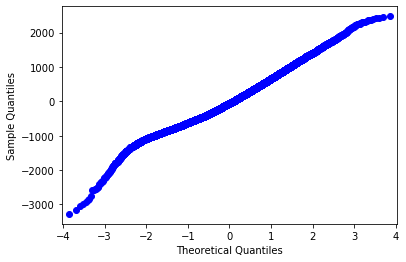

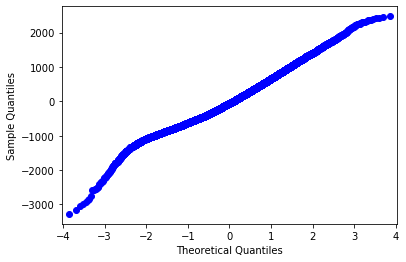

In [17]:
fsm_resids = fsm.resid
import statsmodels.api as sm
sm.qqplot(fsm_resids)

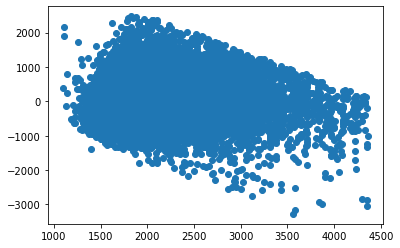

In [18]:
y_hat = fsm.predict()
plt.scatter(y_hat,fsm_resids)
plt.show()

In [ ]:
nextsm = df[df[s]]